In [104]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import os
import re

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split

In [105]:
labelled_data = pd.read_csv("cleaned_labelled.csv")
labelled_data.head()

,tweet_id,text,airline_sentiment
0,570306133677760513,what said,average
1,570301130888122368,plus you ve added commercials to the experienc...,good
2,570301083672813571,i didn t today must mean i need to take anothe...,average
3,570301031407624196,it s really aggressive to blast obnoxious ente...,negative
4,570300817074462722,and it s a really big bad thing about it,worse


In [106]:
stopwords_set = stopwords.words('english')
LEMMER = WordNetLemmatizer() 
STEMMER=PorterStemmer()

def my_lemmer(input_string):
    words = re.sub(r"[^A-Za-z\-]", " ", input_string).lower().split()
    words = [LEMMER.lemmatize(word) for word in words if word not in stopwords_set]
    return words

def my_stemmer(input_string):
    words = re.sub(r"[^A-Za-z\-]", " ", input_string).lower().split()
    words = [STEMMER.stem(word) for word in words if word not in stopwords_set]
    return words

def my_stemmer_and_stop(input_string):
    words = re.sub(r"[^A-Za-z\-]", " ", input_string).lower().split()
    words = [STEMMER.stem(word) for word in words if word not in stopwords_set]
    return words

In [107]:
tfidf = CountVectorizer(input = "content", max_features=50, tokenizer = my_stemmer_and_stop, stop_words='english',ngram_range=(1,2))

In [108]:
tfidf_data = tfidf.fit_transform(labelled_data.text.values)

C:\Users\vatss\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  % sorted(inconsistent)


In [109]:
data_tfidf = pd.DataFrame(tfidf_data.toarray(),columns=tfidf.get_feature_names_out())
data_tfidf.head()

,agent,airlin,airport,amp,bag,board,book,cancel,cancel flight,cancel flightl,...,thank,ticket,time,today,travel,tri,u,wait,way,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# removing columns with names smaller than 2 characters

for col in data_tfidf.columns:
    if(re.search(r'[^A-Za-z]+', col)):
        print(col)
        data_tfidf=data_tfidf.drop([col], axis=1)
    elif len(str(col))<=2:
        print(col)
        data_tfidf=data_tfidf.drop([col], axis=1)

cancel flight
cancel flightl
custom servic
hr
u


In [111]:
data_tfidf_labelled = data_tfidf.copy()
data_tfidf_labelled['label'] = labelled_data['airline_sentiment']

In [113]:
data_tfidf_labelled.to_csv("numeric_data.csv")

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labelled_data.airline_sentiment)

In [10]:
data_tfidf_labelled.drop(columns = ['label'],inplace=True)

In [11]:
data_tfidf_labelled

,agent,airlin,airport,amp,bag,board,book,cancel,chang,check,...,servic,thank,ticket,time,today,travel,tri,wait,way,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y

array([0, 1, 0, ..., 0, 2, 0])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_tfidf_labelled, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10248, 45), (4392, 45), (10248,), (4392,))

In [15]:
X_train

,agent,airlin,airport,amp,bag,board,book,cancel,chang,check,...,servic,thank,ticket,time,today,travel,tri,wait,way,work
7717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13854,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
11719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13418,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
X_test

,agent,airlin,airport,amp,bag,board,book,cancel,chang,check,...,servic,thank,ticket,time,today,travel,tri,wait,way,work
4794,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10480,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8292,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12156,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2245,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4165,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_train

array([0, 2, 3, ..., 3, 3, 0])

In [18]:
y_test

array([1, 3, 2, ..., 3, 3, 2])

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import graphviz 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [20]:
def tree_viz(clf,column_names):
    plt.figure(figsize=(30,20))
    plot_tree(clf, filled=True, feature_names=column_names, class_names=le.classes_)
    plot = plt.gcf()
    plt.show()

In [97]:
params = [
    {'min_samples_split' : 5, 
     'class_weight' : 'balanced',
     'max_depth' : 10,
     'ccp_alpha' : 0.001
    },
    {'min_samples_split' : 2, 
     'class_weight' : 'balanced',
     'max_depth' : 5,
     'ccp_alpha' : 0.001
    },
    {'min_samples_split' : 2, 
     'class_weight' : 'balanced',
     'max_depth' : 15,
     'ccp_alpha' : 0.001
    }
]

MyDT=DecisionTreeClassifier()

In [98]:
DT1=MyDT.fit(X_train, y_train)
y_pred = DT1.predict(X_test)

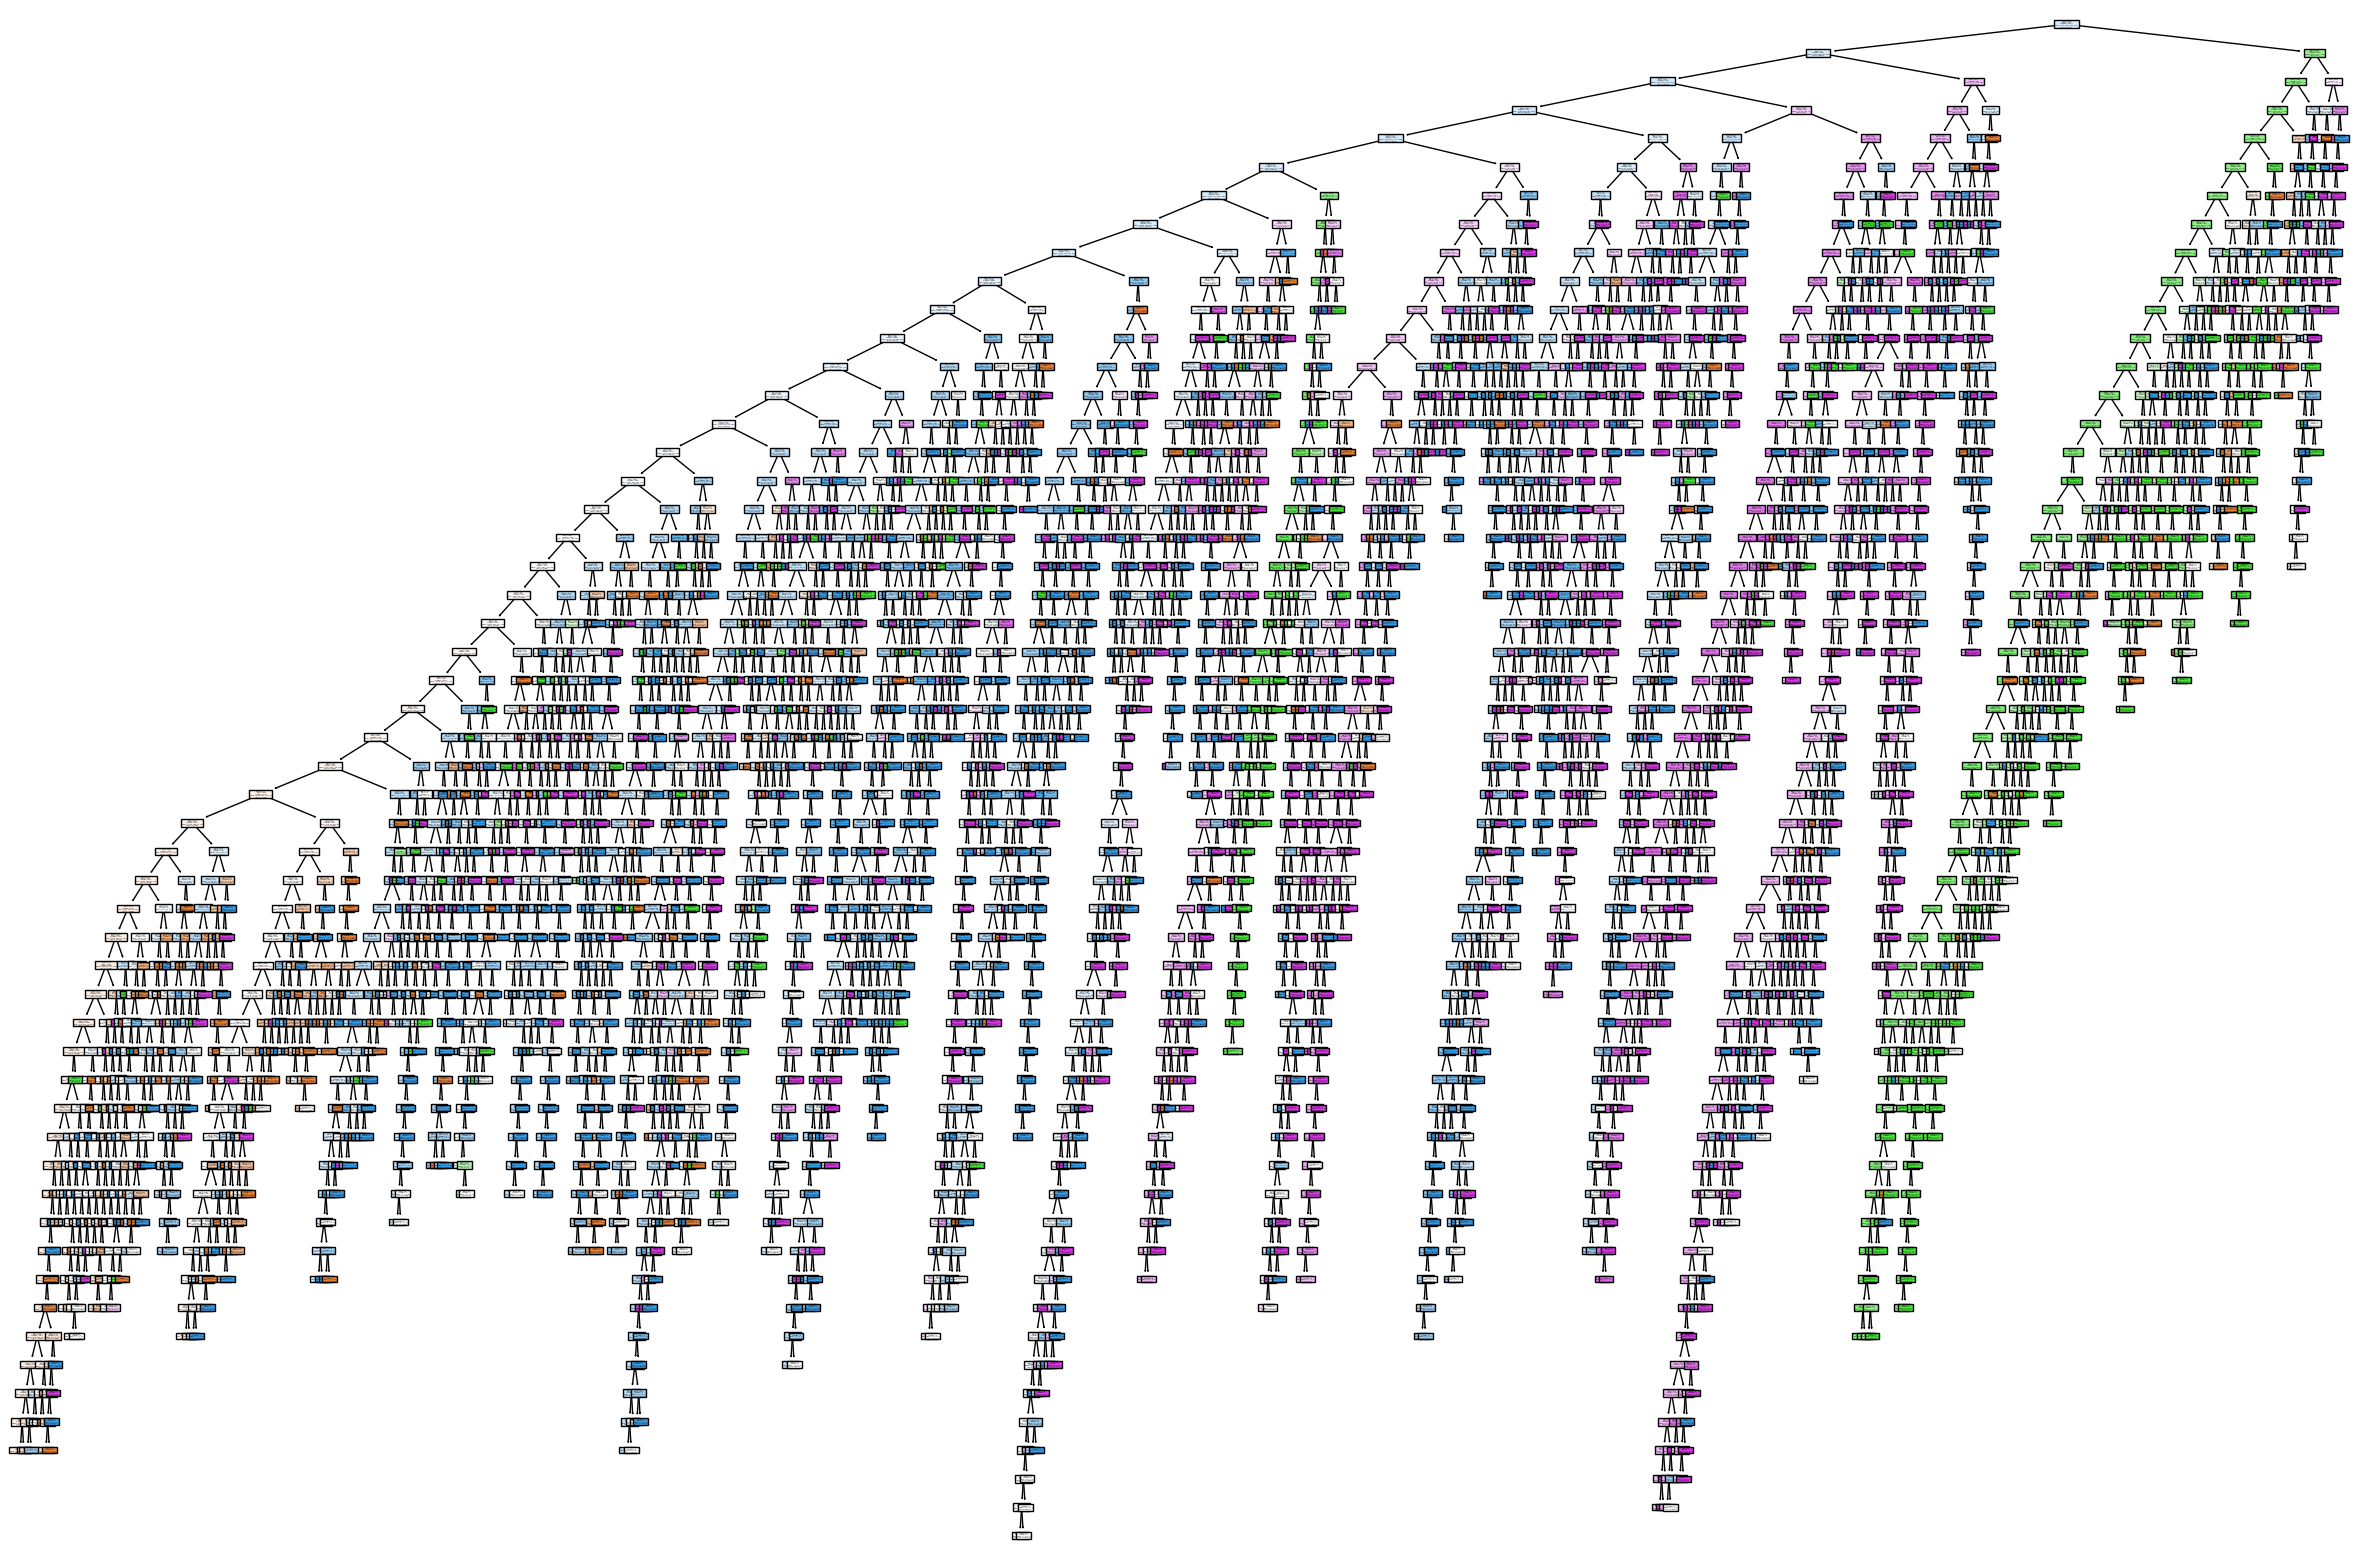

In [99]:
column_names = X_train.columns
tree_viz(DT1,column_names)

In [100]:
cm = confusion_matrix(y_test, y_pred, labels=MyDT.classes_)

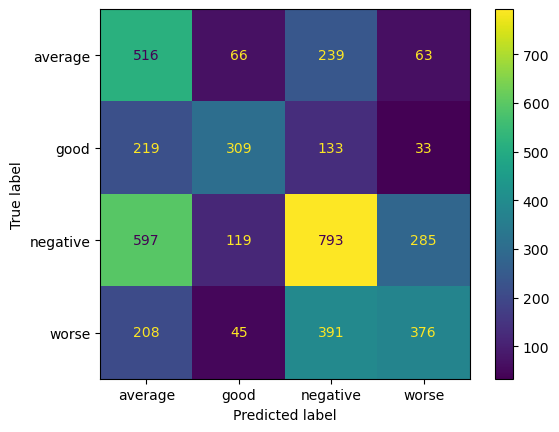

In [101]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.show()

In [103]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

     average       0.34      0.58      0.43       884
        good       0.57      0.45      0.50       694
    negative       0.51      0.44      0.47      1794
       worse       0.50      0.37      0.42      1020

    accuracy                           0.45      4392
   macro avg       0.48      0.46      0.46      4392
weighted avg       0.48      0.45      0.46      4392

